---------------------------------- Data set preparation -------------------------
Number of Numerical features:  35
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
--------------------------------------------------------------------------------
Number of Categorical features:  28
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
 

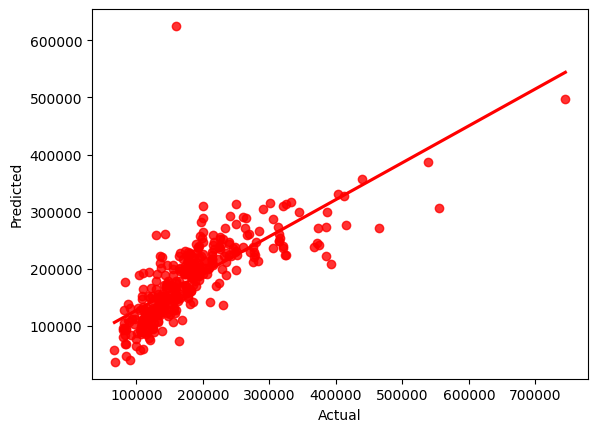

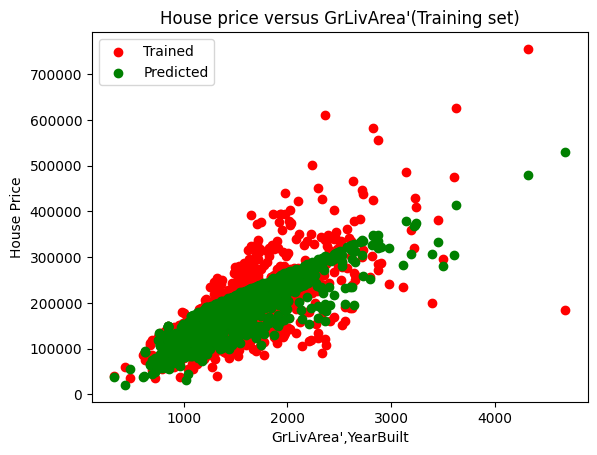

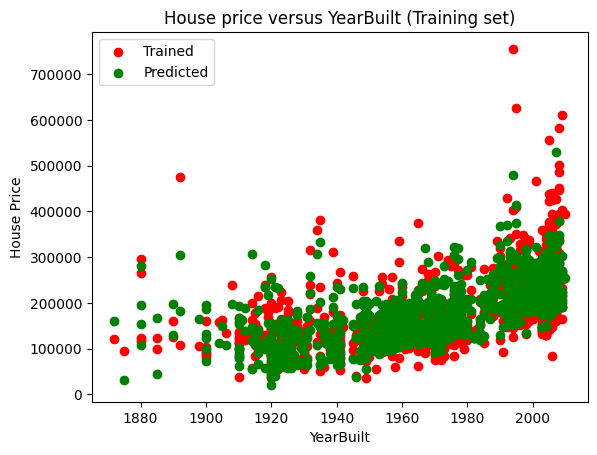

---------------------------------- Problem 3-------------------------------------
---------------------------------- Problem 3: Linear regression------------------
Coefficients: 
 [[  98.588892   1041.18622755]]
Mean squared error: 2725908099.06
Coefficient of determination: 0.59
0.6769659997783973


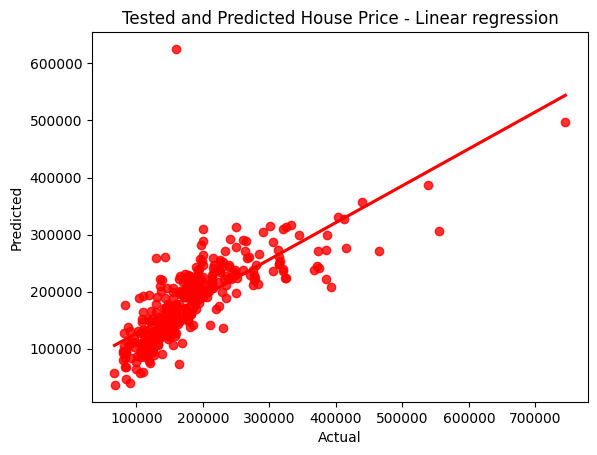

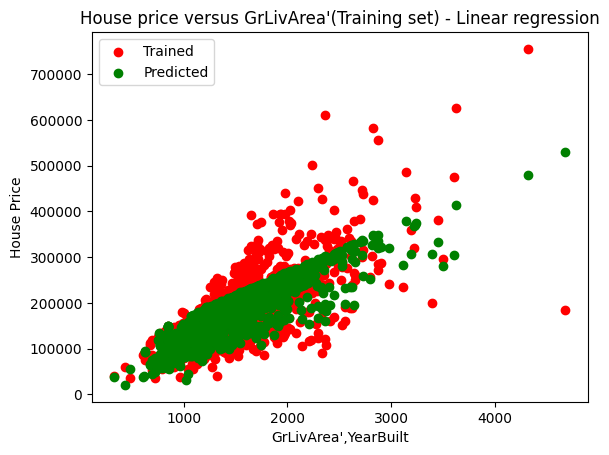

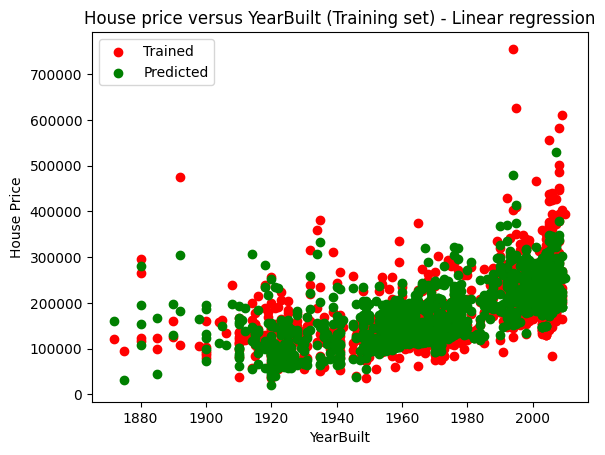

---------------------------------- Problem 3: SVM -------------------------------


C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0365296803652968


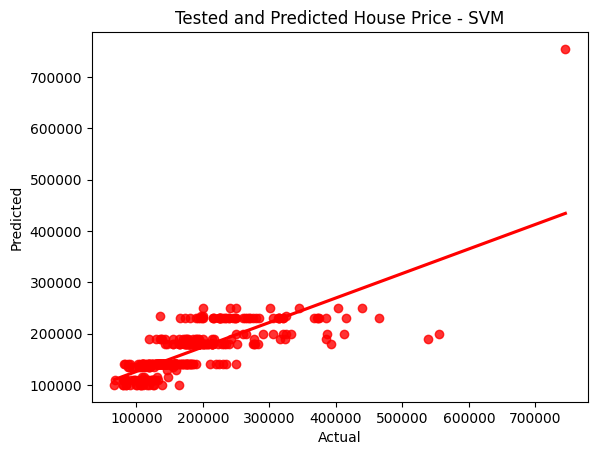

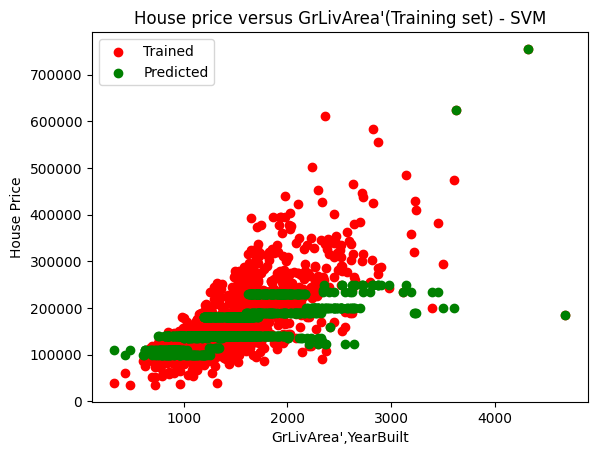

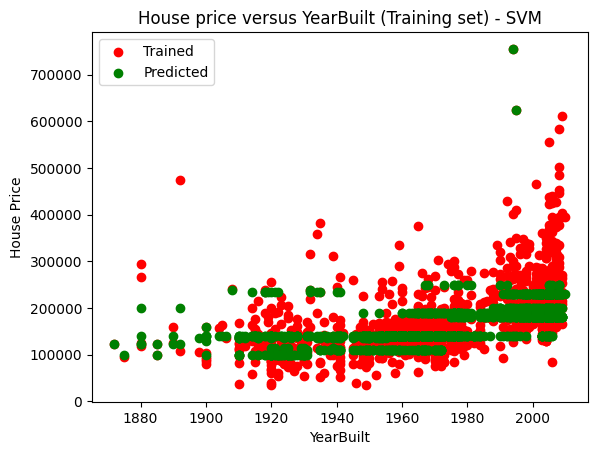

---------------------------------- Problem 3: Decision tree ---------------------
0.9570776255707762


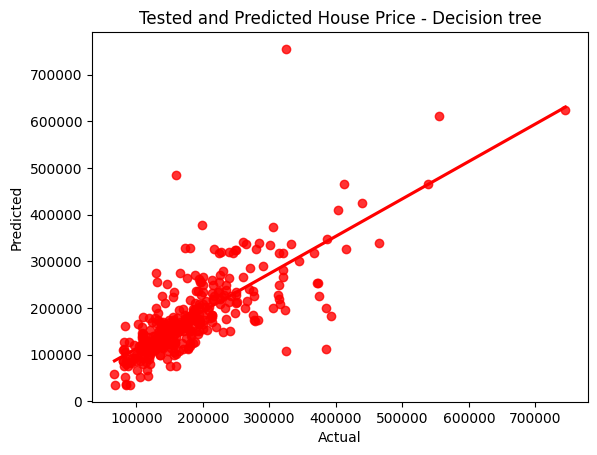

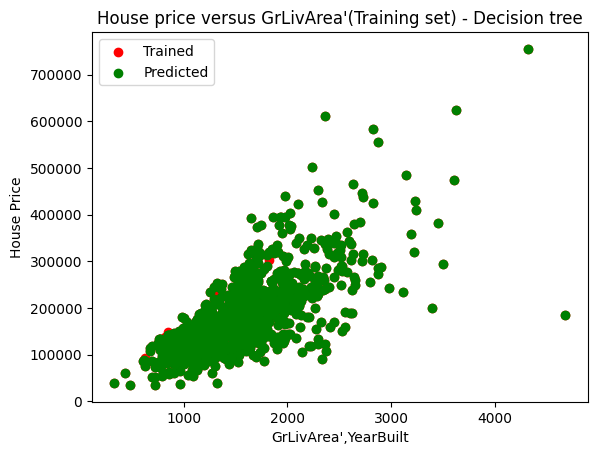

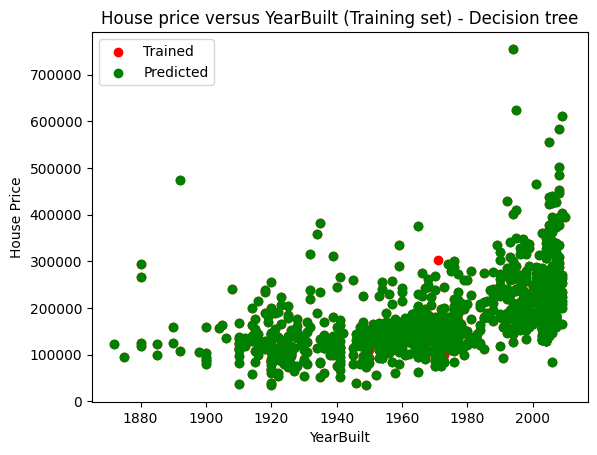

---------------------------------- Problem 3: Random forest ---------------------


C:\Users\Mohammed Khalil\workspace\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.0410958904109589


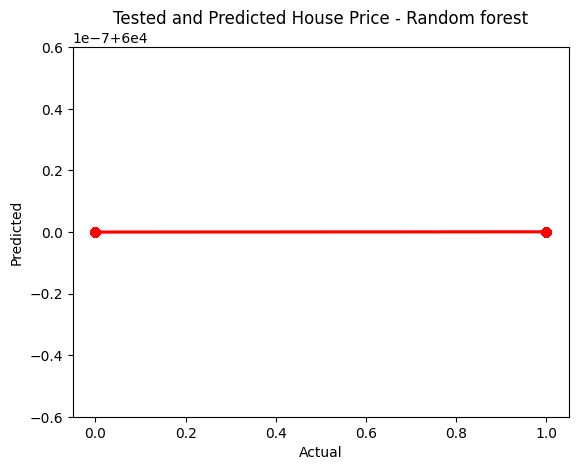

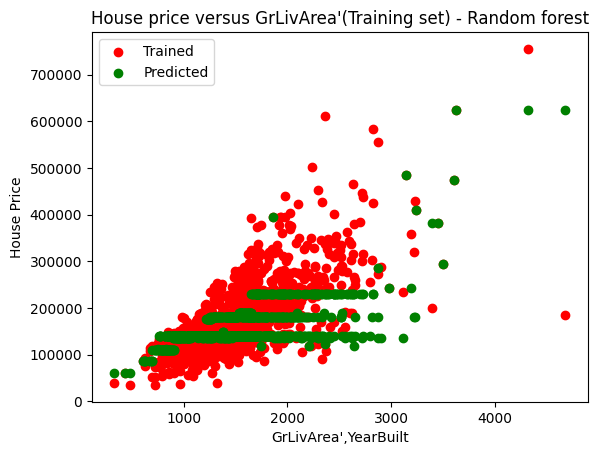

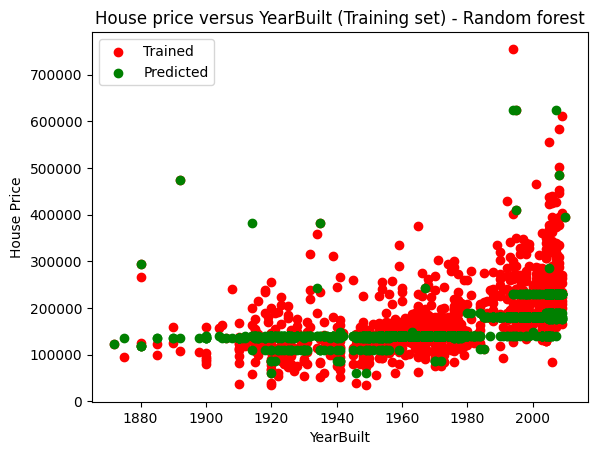

---------------------------------- Problem 4-------------------------------------
Coefficients: 
 [[  83.47434488  778.69549096 5937.67640683   71.43071766]]
Mean squared error: 2543695364.95
Coefficient of determination: 0.61


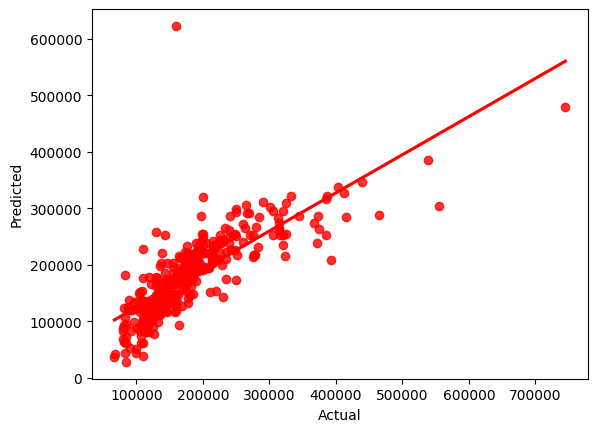

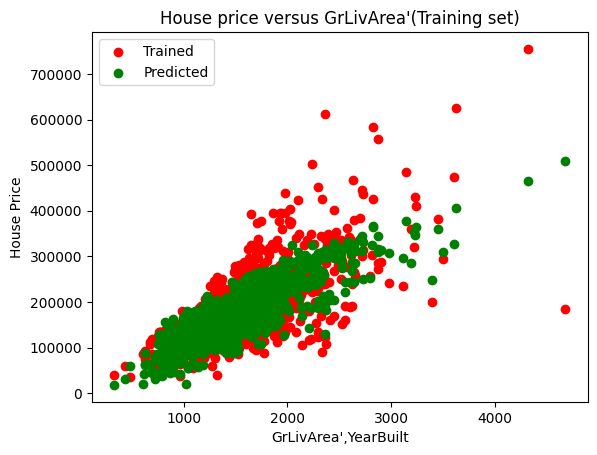

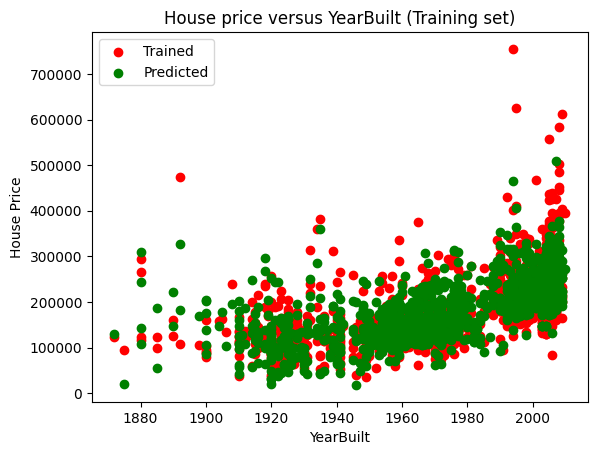

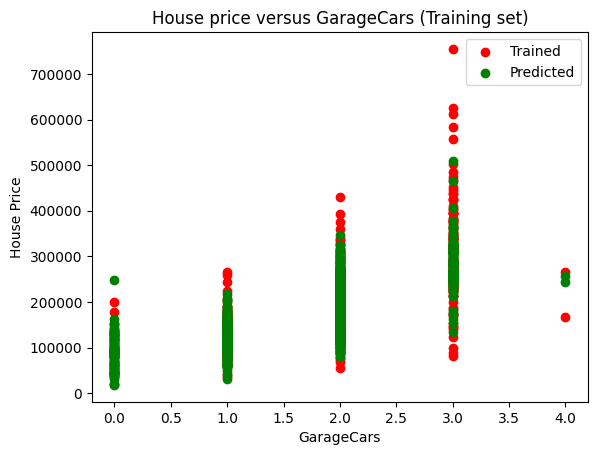

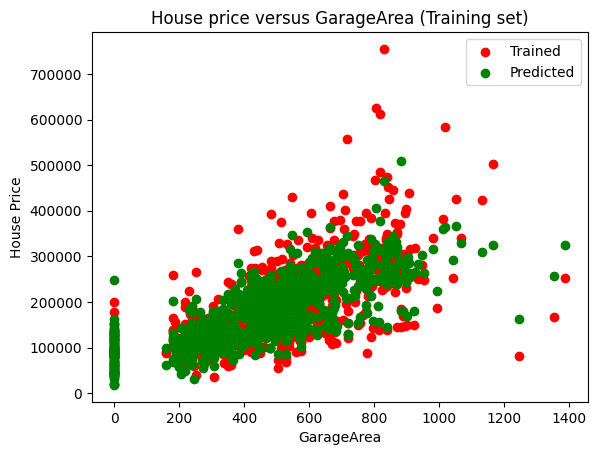

In [90]:
# Assignment Title: Housing Price Forecasts
# -----------------------------------------
# The objectives of this assignment are:
# 1. Get an overview of supervised learning (regression problem)
# 2. Use scikit-learn to perform regressions
# 3. Make a brief comparison of the methods.
# -----------------------------------------
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Data set preparation
# --------------------
print('---------------------------------- Data set preparation -------------------------')
df = pd.read_csv("train.csv")

# Check the percentage of missing values.
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'missing_ratio'])

# Delete features (columns) that have 5 or more missing values.
pct_null = df.isnull().sum()
missing_features = pct_null[pct_null >= 5].index
df.drop(missing_features, axis=1, inplace=True)

# Samples (rows) with missing values are deleted from the data from which features with 5 or more missing values have been deleted.
df.dropna(axis=0, thresh=5, inplace=True)


numerical_feats = df.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
print(df[numerical_feats].columns)
print("-"*80)
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))
print(df[categorical_feats].columns)


# Flow of regression problem
# --------------------------
# we will use only two explanatory variables (features), GrLivArea and YearBuilt, 
# in order to prioritize the practice of learning and evaluation of regression problems.
print('---------------------------------- Flow of regression problem -------------------')
#  [Problem 1] Feature selection for practice 
# -------------------------------------------
print('---------------------------------- Problem 1-------------------------------------')
X = pd.DataFrame(df, columns = ['GrLivArea','YearBuilt'])
y = pd.DataFrame(df, columns = ['SalePrice'])
print(X)
print(y)

# 75% of the data will be the training data, and 25% will be the test data to verify our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# [Problem 2] Estimation and evaluation by linear regression
# ----------------------------------------------------------
print('---------------------------------- Problem 2-------------------------------------')

# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "green")
plt.title("House price versus GrLivArea'(Training set)")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "green")
plt.title("House price versus YearBuilt (Training set)")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# [Problem 3] Comparison of methods
# ---------------------------------
print('---------------------------------- Problem 3-------------------------------------')


# Linear regression
# -----------------
print('---------------------------------- Problem 3: Linear regression------------------')
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

print(model.score(X_train, y_train))

# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Linear regression")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "green")
plt.title("House price versus GrLivArea'(Training set) - Linear regression")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "green")
plt.title("House price versus YearBuilt (Training set) - Linear regression")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# SVM
# ---
print('---------------------------------- Problem 3: SVM -------------------------------')
# Create SVM object
model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - SVM")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "green")
plt.title("House price versus GrLivArea'(Training set) - SVM")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "green")
plt.title("House price versus YearBuilt (Training set) - SVM")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()


# Decision tree
# -------------
print('---------------------------------- Problem 3: Decision tree ---------------------')
# Create Decision tree object
model = DecisionTreeClassifier(random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Decision tree")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "green")
plt.title("House price versus GrLivArea'(Training set) - Decision tree")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "green")
plt.title("House price versus YearBuilt (Training set) - Decision tree")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# Random forest
# -------------
print('---------------------------------- Problem 3: Random forest ---------------------')
# Create Random forest object
X_test, y_test = make_classification(n_samples=1000, n_features=2,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
model = RandomForestClassifier(max_depth=2, random_state=0)

# Train the model using the training sets
model.fit(X_train, y_train.values.ravel())

# Make predictions using the testing set
y_pred = model.predict(X_test)

print(model.score(X_train, y_train, sample_weight=None))

clf = RandomForestClassifier(max_depth=2, random_state=0)


# Plot outputs
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
plt.title("Tested and Predicted House Price - Random forest")
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()


plt.scatter(X_train['GrLivArea'], y_train, color = "red")
plt.scatter(X_train['GrLivArea'], model.predict(X_train), color = "green")
plt.title("House price versus GrLivArea'(Training set) - Random forest")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X_train['YearBuilt'], y_train, color = "red")
plt.scatter(X_train['YearBuilt'], model.predict(X_train), color = "green")
plt.title("House price versus YearBuilt (Training set) - Random forest")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# [Problem 4] (Advance assignment) Learning using other features
# --------------------------------------------------------------
print('---------------------------------- Problem 4-------------------------------------')
X2 = pd.DataFrame(df, columns = ['GrLivArea','YearBuilt','GarageCars','GarageArea'])
y2 = pd.DataFrame(df, columns = ['SalePrice'])
# 75% of the data will be the training data, and 25% will be the test data to verify our model
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)


# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X2_train, y2_train)

# Make predictions using the testing set
y2_pred = model.predict(X2_test)

# The coefficients
print("Coefficients: \n", model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y2_test, y2_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y2_test, y2_pred))

# Plot outputs
sns.regplot(x=y2_test,y=y2_pred,ci=None,color ='red');
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

plt.scatter(X2_train['GrLivArea'], y2_train, color = "red")
plt.scatter(X2_train['GrLivArea'], model.predict(X2_train), color = "green")
plt.title("House price versus GrLivArea'(Training set)")
plt.xlabel("GrLivArea',YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['YearBuilt'], y2_train, color = "red")
plt.scatter(X2_train['YearBuilt'], model.predict(X2_train), color = "green")
plt.title("House price versus YearBuilt (Training set)")
plt.xlabel("YearBuilt")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['GarageCars'], y2_train, color = "red")
plt.scatter(X2_train['GarageCars'], model.predict(X2_train), color = "green")
plt.title("House price versus GarageCars (Training set)")
plt.xlabel("GarageCars")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

plt.scatter(X2_train['GarageArea'], y2_train, color = "red")
plt.scatter(X2_train['GarageArea'], model.predict(X2_train), color = "green")
plt.title("House price versus GarageArea (Training set)")
plt.xlabel("GarageArea")
plt.ylabel("House Price")
plt.legend(["Trained", "Predicted"])
plt.show()

# Increasing the number of feature from 2 to 4 (inclding two of the high correlation ceofficients) slightly increased 
# the Coefficient of determination from 0.59 to 0.61
